<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Beds_Occupancy_LSTM_TS_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [4]:
df = pd.read_csv('/content/beds_occupied.csv')
df

,date,occupied
0,11/05/2022 0:00,0.79
1,11/05/2022 1:00,0.79
2,11/05/2022 2:00,0.80
3,11/05/2022 3:00,0.80
4,11/05/2022 4:00,0.80
...,...,...
1995,02/08/2022 3:00,0.81
1996,02/08/2022 4:00,0.82
1997,02/08/2022 5:00,0.82
1998,02/08/2022 6:00,0.82


In [5]:
df.index = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df[:26]

,date,occupied
date,,
2022-05-11 00:00:00,11/05/2022 0:00,0.79
2022-05-11 01:00:00,11/05/2022 1:00,0.79
2022-05-11 02:00:00,11/05/2022 2:00,0.80
2022-05-11 03:00:00,11/05/2022 3:00,0.80
2022-05-11 04:00:00,11/05/2022 4:00,0.80
2022-05-11 05:00:00,11/05/2022 5:00,0.80
2022-05-11 06:00:00,11/05/2022 6:00,0.81
2022-05-11 07:00:00,11/05/2022 7:00,0.81
2022-05-11 08:00:00,11/05/2022 8:00,0.81


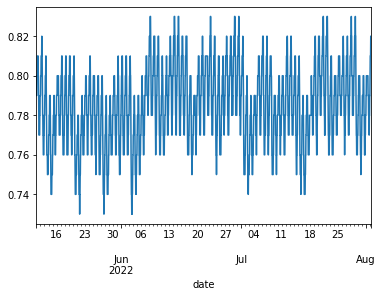

In [6]:
bed = df['occupied']
bed.plot()

In [7]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bed, WINDOW_SIZE)
X1.shape, y1.shape

((1995, 5, 1), (1995,))

In [9]:
X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1750], y1[1500:1750]
X_test1, y_test1 = X1[1750:], y1[1750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 5, 1), (1500,), (250, 5, 1), (250,), (245, 5, 1), (245,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [11]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [12]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
40/47 [========================>.....] - ETA: 0s - loss: 0.8325 - root_mean_squared_error: 0.9124

47/47 [==============================] - 9s 125ms/step - loss: 0.8063 - root_mean_squared_error: 0.8979 - val_loss: 0.6298 - val_root_mean_squared_error: 0.7936
Epoch 2/10
44/47 [===========================>..] - ETA: 0s - loss: 0.5062 - root_mean_squared_error: 0.7114

47/47 [==============================] - 5s 108ms/step - loss: 0.4988 - root_mean_squared_error: 0.7063 - val_loss: 0.3789 - val_root_mean_squared_error: 0.6155
Epoch 3/10
42/47 [=========================>....] - ETA: 0s - loss: 0.3080 - root_mean_squared_error: 0.5550

47/47 [==============================] - 5s 113ms/step - loss: 0.3014 - root_mean_squared_error: 0.5490 - val_loss: 0.2358 - val_root_mean_squared_error: 0.4856
Epoch 4/10
40/47 [========================>.....] - ETA: 0s - loss: 0.1877 - root_mean_squared_error: 0.4332

47/47 [==============================] - 5s 99ms/step - loss: 0.1801 - root_mean_squared_error: 0.4244 - val_loss: 0.1279 - val_root_mean_squared_error: 0.3577
Epoch 5/10
44/47 [===========================>..] - ETA: 0s - loss: 0.0886 - root_mean_squared_error: 0.2977

47/47 [==============================] - 5s 111ms/step - loss: 0.0865 - root_mean_squared_error: 0.2940 - val_loss: 0.0503 - val_root_mean_squared_error: 0.2243
Epoch 6/10
42/47 [=========================>....] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1724

47/47 [==============================] - 5s 103ms/step - loss: 0.0279 - root_mean_squared_error: 0.1671 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1069
Epoch 7/10
46/47 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0707

47/47 [==============================] - 5s 114ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 8/10
45/47 [===========================>..] - ETA: 0s - loss: 5.6774e-04 - root_mean_squared_error: 0.0238

47/47 [==============================] - 5s 109ms/step - loss: 5.5541e-04 - root_mean_squared_error: 0.0236 - val_loss: 2.6540e-04 - val_root_mean_squared_error: 0.0163
Epoch 9/10
44/47 [===========================>..] - ETA: 0s - loss: 2.1431e-04 - root_mean_squared_error: 0.0146

47/47 [==============================] - 5s 98ms/step - loss: 2.1405e-04 - root_mean_squared_error: 0.0146 - val_loss: 2.1960e-04 - val_root_mean_squared_error: 0.0148
Epoch 10/10
43/47 [==========================>...] - ETA: 0s - loss: 2.0313e-04 - root_mean_squared_error: 0.0143

47/47 [==============================] - 5s 115ms/step - loss: 2.0406e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.1797e-04 - val_root_mean_squared_error: 0.0148


In [18]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [19]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.792477,0.80
1,0.794497,0.81
2,0.797295,0.81
3,0.798632,0.81
4,0.800406,0.81
...,...,...
1495,0.807653,0.80
1496,0.807655,0.79
1497,0.805971,0.78
1498,0.800145,0.78


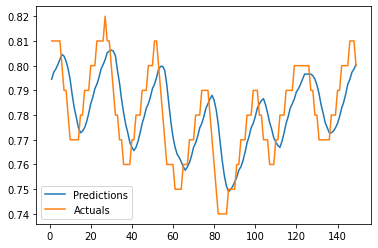

In [20]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:150], label='Predictions')
plt.plot(train_results['Actuals'][1:150], label='Actuals')
plt.legend()